<h1>Ecommerce Customer Churn Prediction</h1>

<h3>The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.</h3>


Data Variable Discerption
    
E Comm CustomerID Unique customer ID
    
E Comm Churn Churn Flag
    
E Comm Tenure Tenure of customer in organization
    
E Comm PreferredLoginDevice Preferred login device of customer
    
E Comm CityTier City tier
    
E Comm WarehouseToHome Distance in between warehouse to home of customer
    
E Comm PreferredPaymentMode Preferred payment method of customer
    
E Comm Gender Gender of customer
    
E Comm HourSpendOnApp Number of hours spend on mobile application or website
    
E Comm NumberOfDeviceRegistered Total number of deceives is registered on particular customer
    
E Comm PreferedOrderCat Preferred order category of customer in last month
    
E Comm SatisfactionScore Satisfactory score of customer on service
    
E Comm MaritalStatus Marital status of customer
    
E Comm NumberOfAddress Total number of added added on particular customer
    
E Comm Complain Any complaint has been raised in last month
    
E Comm OrderAmountHikeFromlastYear Percentage increases in order from last year
    
E Comm CouponUsed Total number of coupon has been used in last month
    
E Comm OrderCount Total number of orders has been places in last month
    
E Comm DaySinceLastOrder Day Since last order by customer
    
E Comm CashbackAmount Average cashback in last month


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'data/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
print(data.shape)
data.isnull().sum()

(5630, 20)


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [4]:
df = data[data['Tenure'].notnull() & data['WarehouseToHome'].notnull() & data['HourSpendOnApp'].notnull() & data['OrderAmountHikeFromlastYear'].notnull() & data['CouponUsed'].notnull() & data['OrderCount'].notnull() & data['DaySinceLastOrder'].notnull()]
df.shape

(3774, 20)

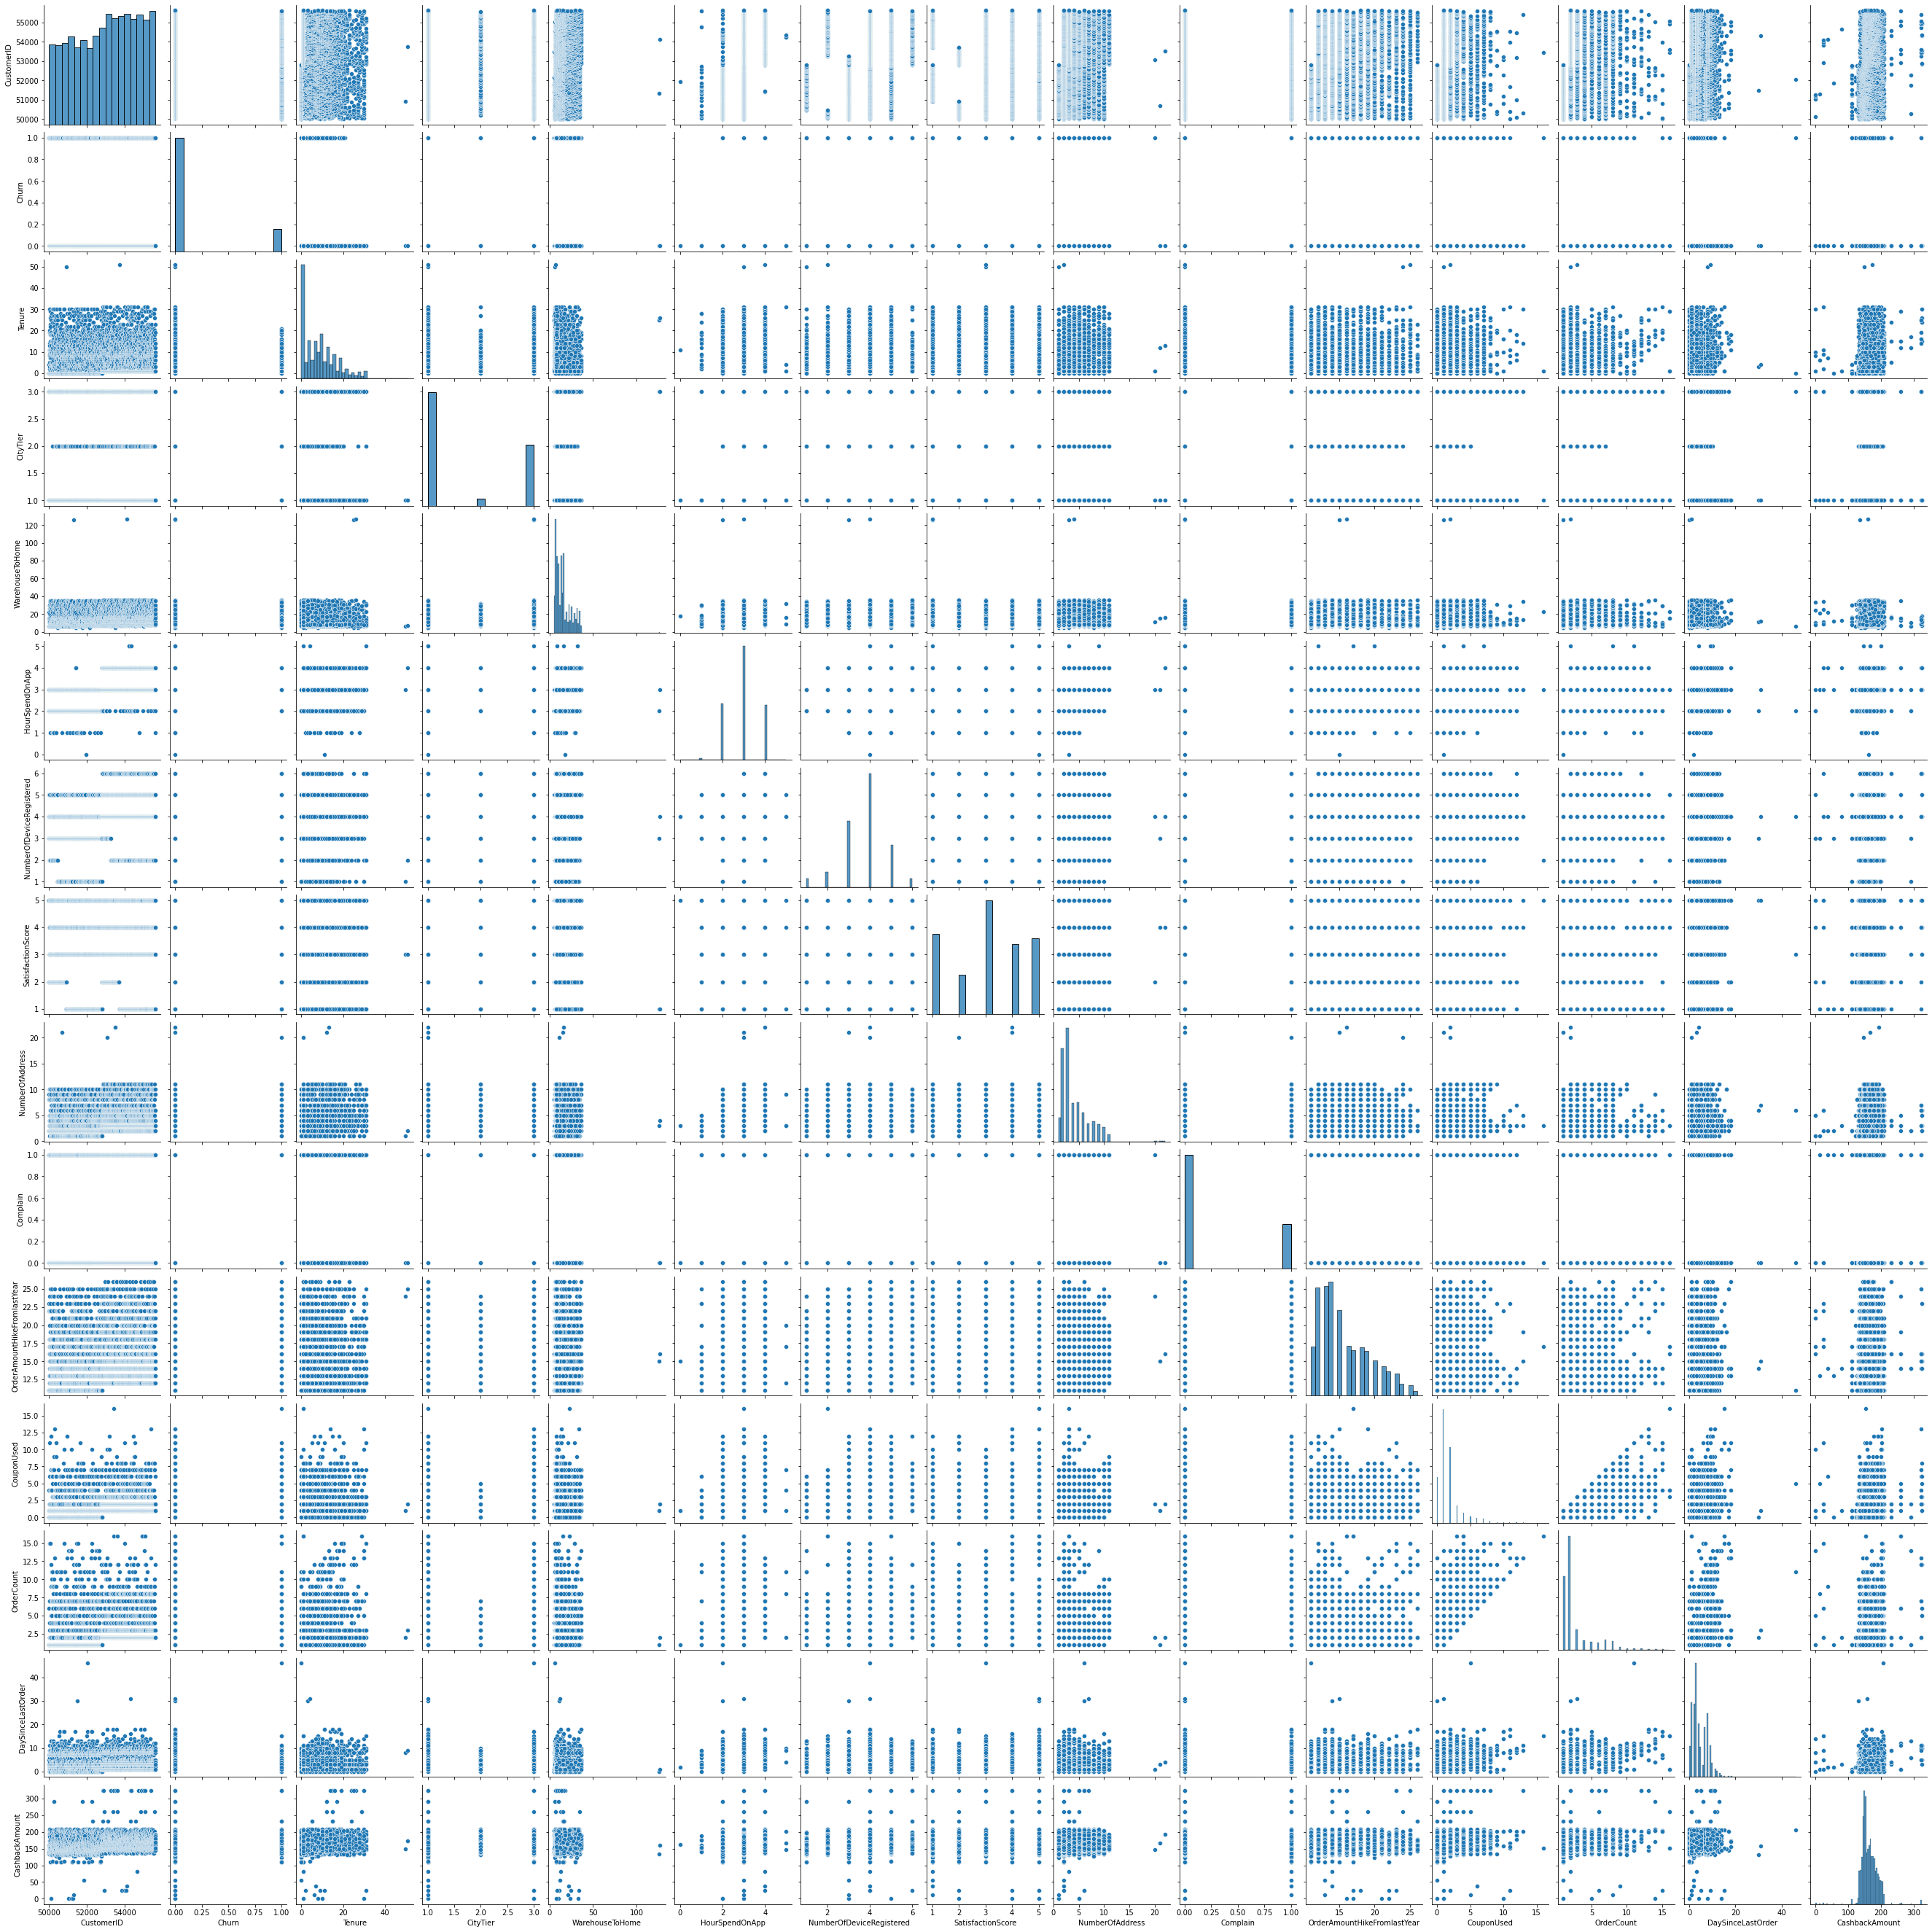

In [5]:
sns.pairplot(df)

<AxesSubplot:>

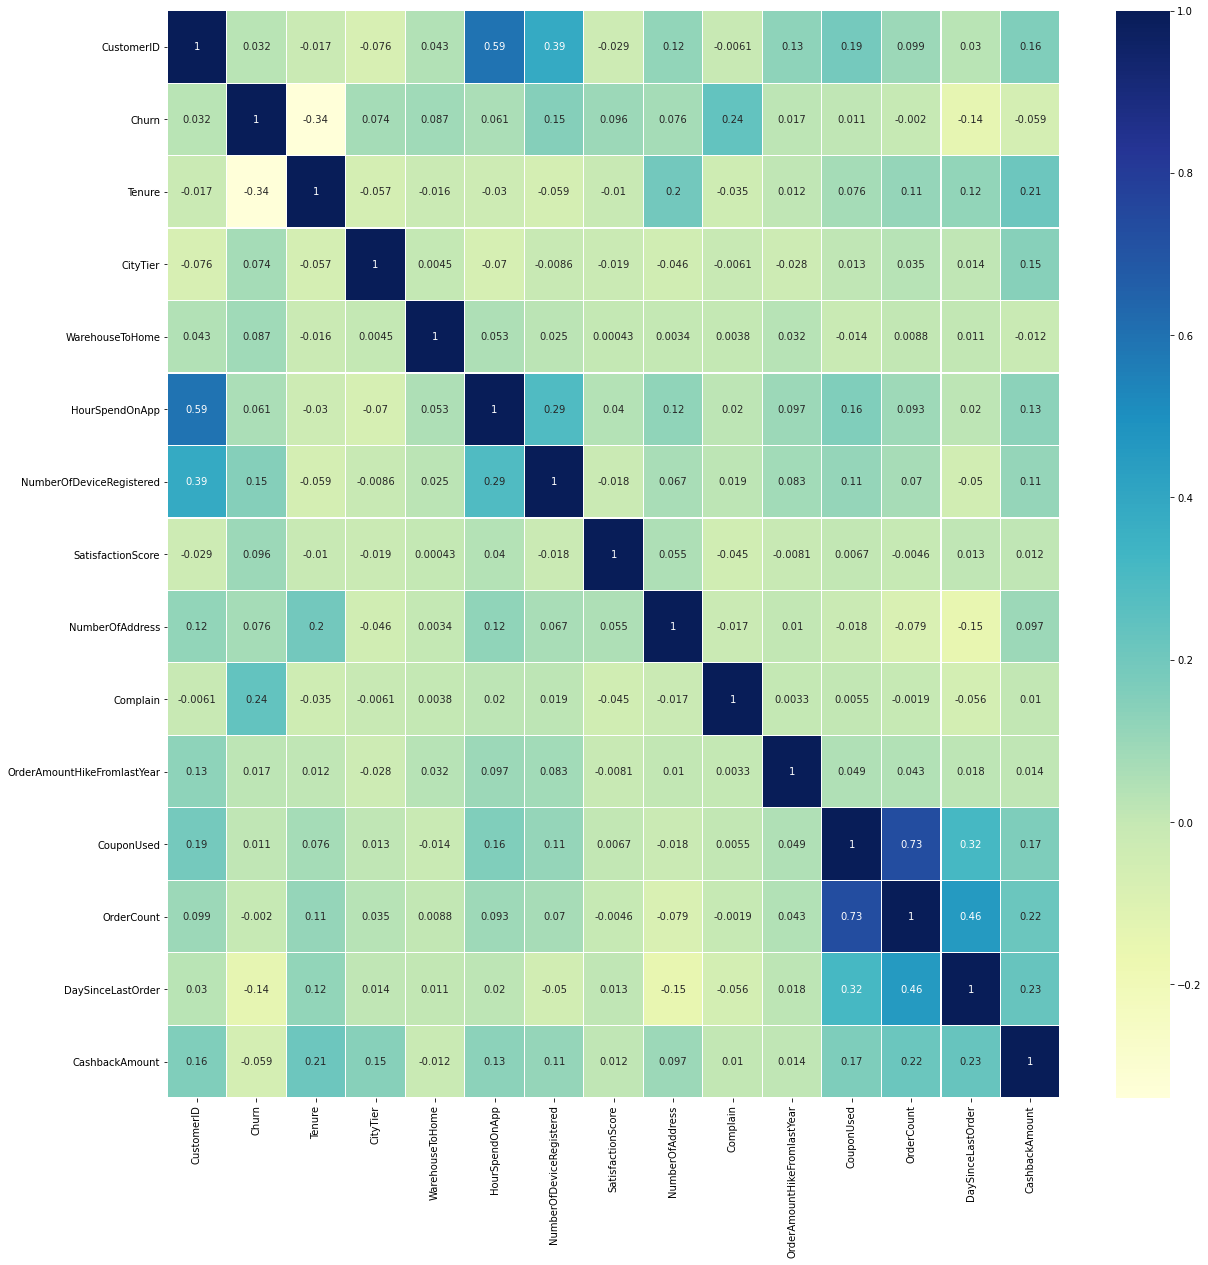

In [6]:
corrmat = df.corr()

f, ax = plt.pyplot.subplots(figsize =(20, 20))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,324.990000


The Cox proportional-hazards model (Cox, 1972) is essentially a regression model commonly used statistical in medical research for investigating the association between the survival time of patients and one or more predictor variables.

The purpose of the model is to evaluate simultaneously the effect of several factors on survival. In other words, it allows us to examine how specified factors influence the rate of a particular event happening (e.g., infection, death) at a particular point in time. This rate is commonly referred as the hazard rate. Predictor variables (or factors) are usually termed covariates in the survival-analysis literature.

The Cox model is expressed by the hazard function denoted by h(t). Briefly, the hazard function can be interpreted as the risk of dying at time t. It can be estimated as follow:

$$h(t)=h0(t)×exp(b1x1+b2x2+...+bpxp)$$

where,

t represents the survival time
h(t) is the hazard function determined by a set of p covariates (x1,x2,...,xp)
the coefficients (b1,b2,...,bp) measure the impact (i.e., the effect size) of covariates.
the term h0 is called the baseline hazard. It corresponds to the value of the hazard if all the xi are equal to zero (the quantity exp(0) equals 1). The ‘t’ in h(t) reminds us that the hazard may vary over time.
The Cox model can be written as a multiple linear regression of the logarithm of the hazard on the variables xi, with the baseline hazard being an ‘intercept’ term that varies with time.

The quantities exp(bi) are called hazard ratios (HR). A value of bi greater than zero, or equivalently a hazard ratio greater than one, indicates that as the value of the ith covariate increases, the event hazard increases and thus the length of survival decreases.

Put another way, a hazard ratio above 1 indicates a covariate that is positively associated with the event probability, and thus negatively associated with the length of survival.

In summary,

HR = 1: No effect

HR < 1: Reduction in the hazard

HR > 1: Increase in Hazard

In [8]:
from lifelines.fitters.coxph_fitter import CoxPHFitter

cox = CoxPHFitter()

In [9]:
df_encoded=df.copy()
df_encoded = pd.get_dummies(df_encoded,drop_first=True)
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,0,0,0,0,0,0,1,0,0,1
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,0,0,1,0,0,1,0,0,0,1


In [10]:
cox.fit(df_encoded[5:], 'DaySinceLastOrder', 'Churn')
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 3769 total observations, 3143 right-censored observations>
             duration col = 'DaySinceLastOrder'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 3769
number of events observed = 626
   partial log-likelihood = -4102.25
         time fit was run = 2021-03-02 10:15:12 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
CustomerID                             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Tenure                                 -0.20       0.82       0.01            -0.22            -0.17                 0.80                 0.84
CityTier                                0.37       1.44       0.05             0.26             0.47                 1.30                 1.61
WarehouseToHome                         0.03       1.03       0.00             0.02             0.04                 1.02                 1.04
HourSpendOnApp                         -0.03       0.97       0.08            -0.19             0.12                 0.83                 1.13
NumberOfDeviceRegistered                0.26       1.30       0.05             0.17             0.35                 1.19                 1.43
SatisfactionScore                       0.12       1.13       0.03             0.06             0.18                 1.07                 1.20
NumberOfAddress                         0.17       1.19       0.01             0.15             0.20                 1.16                 1.22
Complain                                1.10       3.01       0.09             0.93             1.27                 2.54                 3.55
OrderAmountHikeFromlastYear            -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
CouponUsed                              0.04       1.04       0.04            -0.04             0.12                 0.96                 1.13
OrderCount                             -0.14       0.87       0.03            -0.20            -0.08                 0.82                 0.93
CashbackAmount                         -0.01       0.99       0.00            -0.02            -0.00                 0.99                 1.00
PreferredLoginDevice_Mobile Phone      -0.17       0.84       0.10            -0.37             0.02                 0.69                 1.02
PreferredLoginDevice_Phone             -0.32       0.73       0.12            -0.55            -0.08                 0.58                 0.92
PreferredPaymentMode_COD               -0.51       0.60       0.44            -1.36             0.35                 0.26                 1.42
PreferredPaymentMode_Cash on Delivery  -0.09       0.92       0.60            -1.26             1.09                 0.28                 2.97
PreferredPaymentMode_Credit Card       -0.65       0.52       0.44            -1.51             0.21                 0.22                 1.23
PreferredPaymentMode_Debit Card        -0.52       0.60       0.43            -1.37             0.33                 0.26                 1.39
PreferredPaymentMode_E wallet          -0.30       0.74       0.46            -1.19             0.60                 0.30                 1.82
PreferredPaymentMode_UPI               -0.80       0.45       0.46            -1.70             0.09                 0.18                 1.10
Gender_Male                             0.25       1.29       0.09             0.09             0.42                 1.09                 1.53
PreferedOrderCat_Grocery              -10.88       0.00    1052.19         -2073.13          2051.37                 0.00                  inf
PreferedOrderCat_Laptop & Accessory    -0.97       

<AxesSubplot:xlabel='log(HR) (95% CI)'>

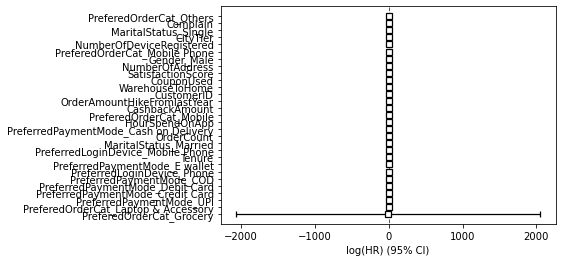

In [11]:
cox.plot()

<AxesSubplot:>

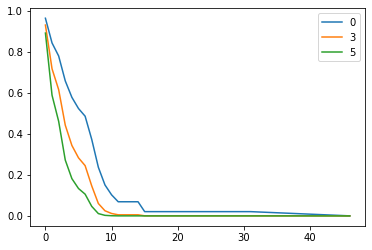

In [12]:
cox.predict_survival_function(df_encoded.loc[:5, df_encoded.columns != 'Churn']).plot()



In [13]:
df_encoded[:5]

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,0,0,0,0,0,0,1,0,0,1
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,0,0,1,0,0,1,0,0,0,1


In [14]:
df_encoded[df_encoded['Churn']==1].shape, df_encoded[df_encoded['Churn']==0].shape

((631, 31), (3143, 31))

In [15]:
df_enc_balanced = pd.concat([df_encoded[df_encoded['Churn']==1], df_encoded[df_encoded['Churn']==0][:631]])
df_enc_balanced.shape

(1262, 31)

In [16]:
df_enc_balanced.head(-5)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,0,0,0,0,0,0,1,0,0,1
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,51265,0,4.0,1,6.0,2.0,5,5,2,0,...,0,0,1,0,1,0,0,0,1,0
1267,51268,0,8.0,3,13.0,2.0,3,1,2,1,...,0,0,0,0,1,0,0,0,1,0
1268,51269,0,0.0,3,15.0,2.0,3,1,2,0,...,1,0,1,0,1,0,0,0,0,1
1269,51270,0,5.0,1,11.0,2.0,4,1,9,0,...,0,0,1,0,1,0,0,0,0,1


In [17]:
cox1 = CoxPHFitter()

cox1.fit(df_enc_balanced[2:-2][1:], 'DaySinceLastOrder', 'Churn')
cox1.print_summary()

<lifelines.CoxPHFitter: fitted with 1257 total observations, 629 right-censored observations>
             duration col = 'DaySinceLastOrder'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 1257
number of events observed = 628
   partial log-likelihood = -3587.64
         time fit was run = 2021-03-02 10:15:20 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
CustomerID                              0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Tenure                                 -0.08       0.92       0.01            -0.10            -0.06                 0.90                 0.94
CityTier                                0.26       1.30       0.05             0.15             0.37                 1.17                 1.44
WarehouseToHome                         0.01       1.01       0.01             0.00             0.02                 1.00                 1.02
HourSpendOnApp                         -0.03       0.97       0.08            -0.19             0.13                 0.83                 1.14
NumberOfDeviceRegistered                0.11       1.11       0.05             0.02             0.20                 1.02                 1.22
SatisfactionScore                       0.03       1.03       0.03            -0.03             0.09                 0.97                 1.09
NumberOfAddress                         0.09       1.10       0.02             0.06             0.12                 1.06                 1.13
Complain                                0.39       1.47       0.09             0.21             0.56                 1.24                 1.76
OrderAmountHikeFromlastYear             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
CouponUsed                              0.06       1.06       0.04            -0.02             0.14                 0.98                 1.15
OrderCount                             -0.20       0.82       0.03            -0.26            -0.14                 0.77                 0.87
CashbackAmount                         -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
PreferredLoginDevice_Mobile Phone       0.03       1.03       0.10            -0.17             0.22                 0.84                 1.25
PreferredLoginDevice_Phone             -0.23       0.80       0.12            -0.46             0.01                 0.63                 1.01
PreferredPaymentMode_COD               -0.78       0.46       0.43            -1.63             0.07                 0.20                 1.07
PreferredPaymentMode_Cash on Delivery   0.06       1.06       0.59            -1.10             1.21                 0.33                 3.36
PreferredPaymentMode_Credit Card       -0.62       0.54       0.43            -1.46             0.21                 0.23                 1.23
PreferredPaymentMode_Debit Card        -0.59       0.56       0.42            -1.42             0.25                 0.24                 1.28
PreferredPaymentMode_E wallet          -0.66       0.51       0.45            -1.54             0.21                 0.21                 1.23
PreferredPaymentMode_UPI               -0.73       0.48       0.45            -1.61             0.15                 0.20                 1.17
Gender_Male                             0.30       1.35       0.09             0.13             0.47                 1.13                 1.60
PreferedOrderCat_Grocery              -11.36       0.00     953.47         -1880.12          1857.41                 0.00                  inf
PreferedOrderCat_Laptop & Accessory    -0.34       0

<AxesSubplot:xlabel='log(HR) (95% CI)'>

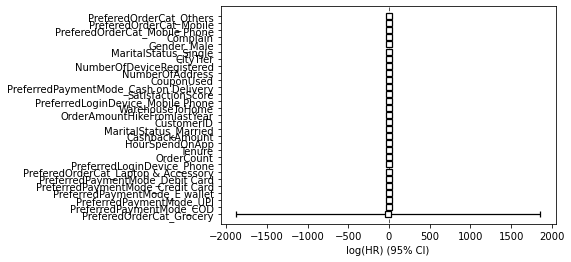

In [18]:
cox1.plot()

             0         3
0.0   0.971931  0.962893
1.0   0.879767  0.843554
2.0   0.822534  0.771460
3.0   0.714895  0.640345
4.0   0.639136  0.551827
5.0   0.585495  0.491180
6.0   0.548214  0.450082
7.0   0.433494  0.329508
8.0   0.293412  0.196219
9.0   0.192260  0.111921
10.0  0.123434  0.062131
11.0  0.083410  0.036918
12.0  0.083410  0.036918
13.0  0.083410  0.036918
14.0  0.083410  0.036918
15.0  0.021880  0.006243
17.0  0.021880  0.006243
46.0  0.000675  0.000062


(0    1
 3    1
 Name: Churn, dtype: int64,
 0    5.0
 3    3.0
 Name: DaySinceLastOrder, dtype: float64)

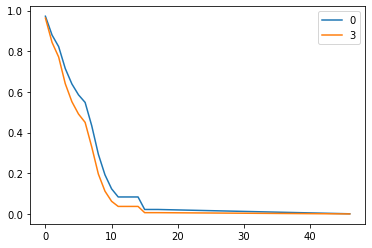

In [35]:
cox1.predict_survival_function(df_encoded.loc[:, df_encoded.columns != 'Churn'][:2]).plot()
print(cox1.predict_survival_function(df_encoded.loc[:, df_encoded.columns != 'Churn'][:2]))
df_encoded[:2]['Churn'], df_encoded[:2]['DaySinceLastOrder']

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,...,0,0,1,0,1,0,0,0,1,0
5629,55630,0,8.0,1,15.0,3.0,2,3,4,0,...,0,0,1,0,1,0,0,0,1,0


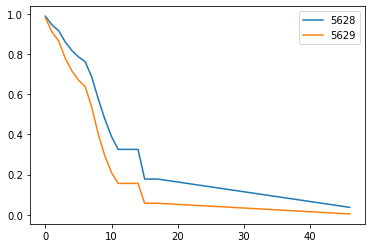

In [20]:
cox1.predict_survival_function(df_encoded.loc[:, df_encoded.columns != 'Churn'][-2:]).plot()
df_encoded[-2:]

In [21]:
from lifelines.fitters.kaplan_meier_fitter import KaplanMeierFitter

In [22]:
kpm = KaplanMeierFitter(alpha = 0.05)

In [24]:
kpm.fit(df_enc_balanced['DaySinceLastOrder'], df_enc_balanced['Churn'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1262 total observations, 631 right-censored observations>

<AxesSubplot:xlabel='timeline'>

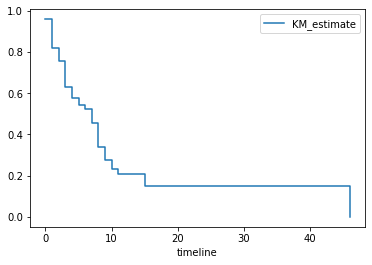

In [27]:
kpm.plot(ci_show=False)

<AxesSubplot:xlabel='timeline'>

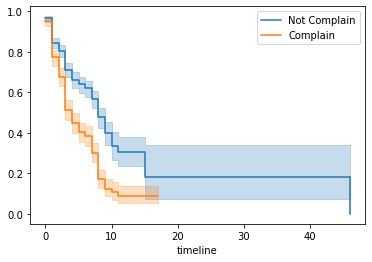

In [30]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

kmf1.fit(df_enc_balanced['DaySinceLastOrder'][df_enc_balanced['Complain'] == 0], df_enc_balanced['Churn'][df_enc_balanced['Complain'] == 0], label='Not Complain')
a1 = kmf1.plot()

kmf1.fit(df_enc_balanced['DaySinceLastOrder'][df_enc_balanced['Complain'] == 1], df_enc_balanced['Churn'][df_enc_balanced['Complain'] == 1], label='Complain')
kmf1.plot(ax=a1)

In [42]:
cox.score(df_encoded, 'concordance_index')

0.8785861623136723